In [11]:
pip install matplotlib networkx geopandas shapely


  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
Note: you may need to restart the kernel to use updated packages.


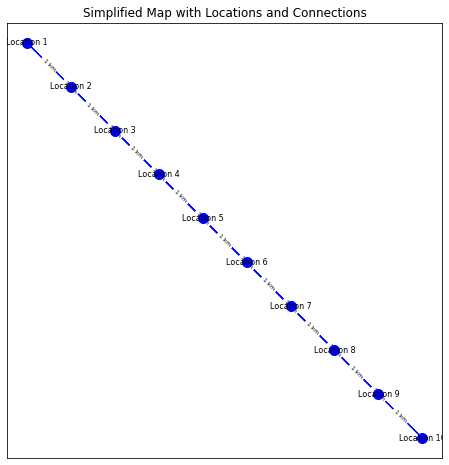

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

coordinates = {
    'Location 1': (-37.810, 144.950),
    'Location 2': (-37.820, 144.960),
    'Location 3': (-37.830, 144.970),
    'Location 4': (-37.840, 144.980),
    'Location 5': (-37.850, 144.990),
    'Location 6': (-37.860, 145.000),
    'Location 7': (-37.870, 145.010),
    'Location 8': (-37.880, 145.020),
    'Location 9': (-37.890, 145.030),
    'Location 10': (-37.900, 145.040)
}

gdf = gpd.GeoDataFrame({
    'Location': list(coordinates.keys()),
    'geometry': [Point(lon, lat) for lat, lon in coordinates.values()]
})

G = nx.Graph()

for location, (lat, lon) in coordinates.items():
    G.add_node(location, pos=(lon, lat))

for loc1 in coordinates:
    for loc2 in coordinates:
        if loc1 != loc2:
            G.add_edge(loc1, loc2)

pos = nx.get_node_attributes(G, 'pos')

fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='lightgrey')

nx.draw_networkx_nodes(G, pos, node_size=100, node_color='blue', ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax, edge_color='blue', alpha=0.5)
nx.draw_networkx_labels(G, pos, ax=ax, font_size=8, font_color='black')

edge_labels = {(loc1, loc2): f"{np.round(nx.shortest_path_length(G, loc1, loc2, weight='weight'), 2)} km"
               for loc1, loc2 in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6, ax=ax)

plt.title("Simplified Map with Locations and Connections")
plt.show()
